In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

In [3]:
df_asli = pd.read_csv('dataset.csv')
df = df_asli.copy()

In [5]:
kategori = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
numerikal = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',  
             'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','SpecialDay']
date = ['Month']

## Missing Value

In [5]:
df.isna().sum()

Administrative             111
Administrative_Duration    633
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration    639
BounceRates                 74
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems           524
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

Dikarenakan jumlah data numerik yang null berpotensi cukup banyak, bisa kita fill menggunakan median. Dipilih median karena sebaran data yang skew ke kanan, sehingga nilai mean lebih tinggi dari median.

In [6]:
df['Administrative'] = df['Administrative'].fillna(value=df['Administrative'].median())
df['Administrative_Duration'] = df['Administrative_Duration'].fillna(value=df['Administrative_Duration'].median())
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].fillna(value=df['ProductRelated_Duration'].median())
df['BounceRates'] = df['BounceRates'].fillna(value=df['BounceRates'].median())

Data kategorikal yang null tidak terlalu banyak sehingga bisa kita drop

In [7]:
df = df.dropna(subset=['OperatingSystems'])

In [8]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Duplicated Data

In [9]:
df.duplicated().sum()

694

Hapus duplikat tapi simpan nilai yang pertama muncul.

In [8]:
df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

## Handle Categorical

### Grouping

Penamaan data kategorikal berdasarkan EDA di stage 1

In [9]:
df.Region = df.Region.astype('string').replace(['1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      ['Jakarta', 'Bandung', 'Surabaya', 'Medan', 'Batam', 'Makassar', 'Tangerang', 'Yogyakarta', 'Semarang'])

df.Browser = df.Browser.astype('string').replace(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'],
                                ['Safari', 'Google Chrome', 'Internet Explorer', 'Mozilla Firefox', 'Microsoft Edge', 'Samsung Internet', 'Maxthon Browser', 'Brave', 'Vivaldi', 'UC Browser', 'DuckDuckGo', 'Opera', 'Netscape Navigator'])

df.OperatingSystems = df.OperatingSystems.astype('string').replace(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'],
                                                  ['iOS', 'Windows', 'Android', 'MAC OS', 'Blackberry', 'Chrome Os', 'Unix', 'Linux'])

df.TrafficType = df.TrafficType.astype('string').replace(['1', '2', '3', '4', '5', '6', '8', '10', '13'],
                                        ['Organic Search', 'Paid Search', 'Direct Traffic', 'Social Media', 'Facebook Ads', 'Referral Traffic', 'Email Marketing ', 'Display Advertising', 'Affiliate Marketing'])

beberapa data memiliki count yang sangat kecil seperti :  
  
- VisitorType : Other  
- Operating system : 4 (Mac OS), 5 (Blackberry OS), 6 (Chrome OS), 7 (Unix), 8  
- browser : 7 (Maxthon), 9 (Vivaldi), 11 (DuckDuckGo), 12 (Opera), 13 (Netscape)  
- traffic type : 9,7,12,14,15,16,17,18,19  
data ini memiliki potensi untuk didrop atau digabung menjadi "other"  

In [10]:
df = df.drop(df.loc[df['VisitorType'] =='Other'].index) 

In [11]:
os_replace = ['MAC OS', 'Blackberry', 'Chrome Os', 'Unix', 'Linux']
browser_replace =  ['Maxthon Browser', 'Vivaldi', 'DuckDuckGo', 'Opera', 'Netscape Navigator']
traffic_replace = ['9','7','12','14','15','16','17','18','19']

In [12]:
df['OperatingSystems'] = df['OperatingSystems'].astype('string').replace(to_replace=os_replace,value='other')
df['Browser'] = df['Browser'].astype('string').replace(to_replace=browser_replace,value='other')
df['TrafficType'] = df['TrafficType'].astype('string').replace(to_replace=traffic_replace,value='other')

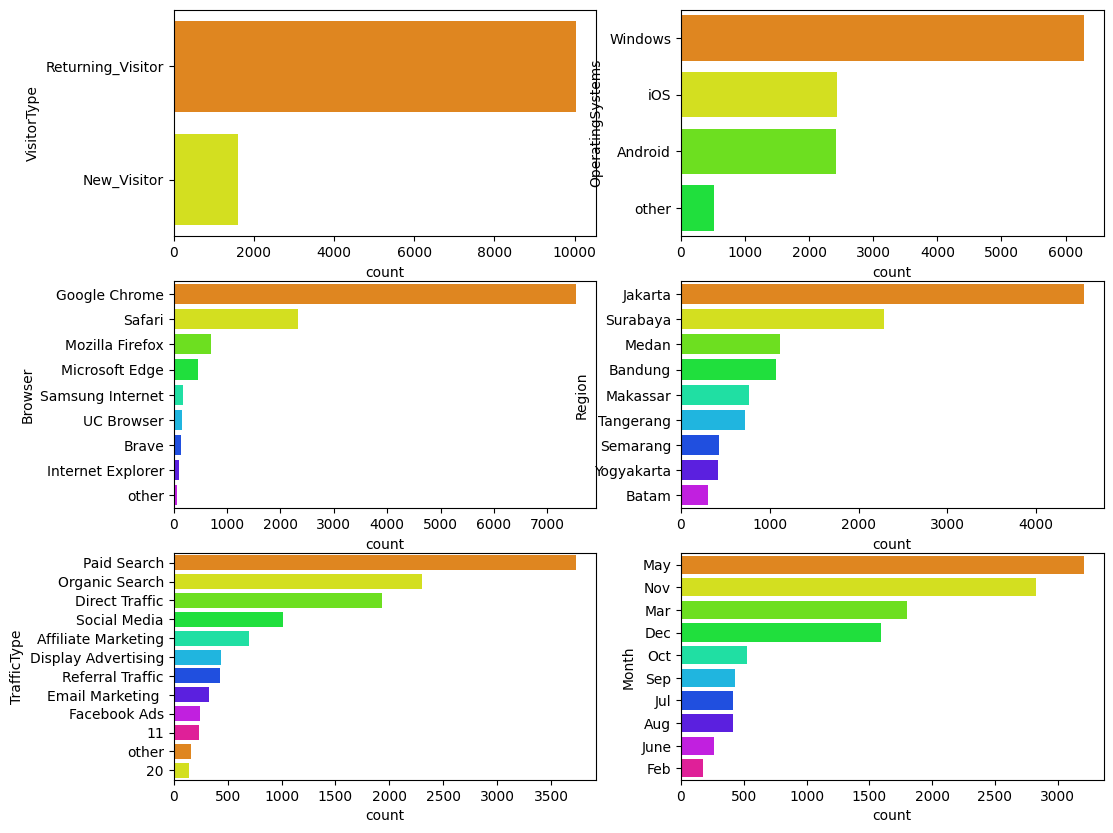

In [16]:
cat2 = ['VisitorType','OperatingSystems', 'Browser', 'Region', 'TrafficType','Month']
palette = sns.color_palette("hsv", 10)
plt.figure(figsize=(12, 10))
for i in range(0,len(cat2)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[cat2[i]],order = df[cat2[i]].value_counts().index,palette=palette)

### Feature encoding

Semua fitur kategorikal tidak memiki sifat berurutan atau memiliki derajat, sehingga bisa dilakukan one hot encoding.

In [13]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend','Month']
df = pd.get_dummies(df, columns=columns_to_encode)

## Handling Numerical

### Outlier

In [14]:
outlier = ['Administrative','Administrative_Duration','Informational','Informational_Duration',
           'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates',
           'PageValues']

Dikarenakan sebaran data yang skew ke kanan, diterapkan log transformation untuk menormalkan sebaran data

In [15]:
for num in df[outlier]:
    min_value = df[df[num] > 0][num].min() / 2
    df[num] = np.log(df[num] + min_value)

In [16]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in outlier:
    zscore = abs(stats.zscore(df[col])) 
    filtered_entries = (zscore < 3) & filtered_entries
    
df_zscore = df[filtered_entries] 
df = df_zscore
print(f'Jumlah baris setelah memfilter outlier: {len(df_zscore)}')

Jumlah baris sebelum memfilter outlier: 11649
Jumlah baris setelah memfilter outlier: 10719


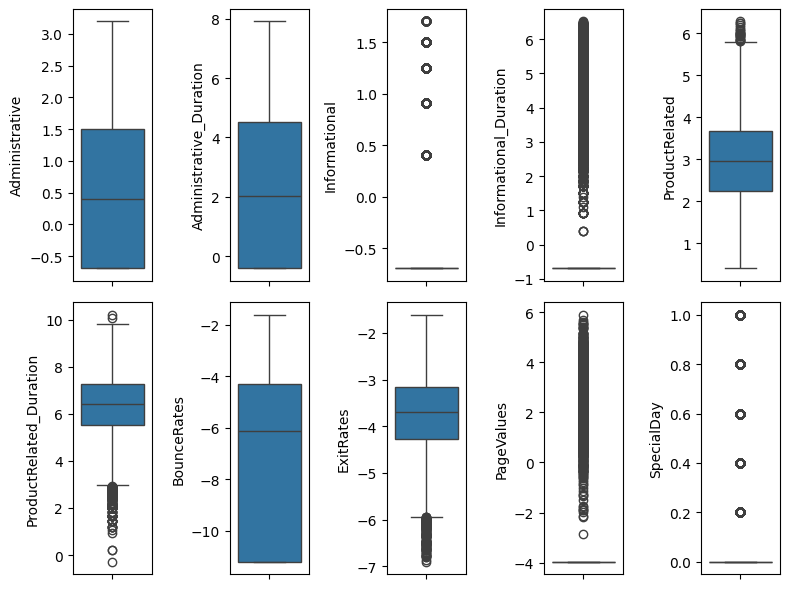

In [30]:
plt.figure(figsize=(8, 6))
for i in range(0,len(numerikal)):
    plt.subplot(2,5,i+1)
    sns.boxplot(y=df_zscore[numerikal[i]],orient='v')
    plt.tight_layout()

In [21]:
df.keys()

Index(['Administrative', 'Informational', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Revenue', 'OperatingSystems_Android',
       'OperatingSystems_Windows', 'OperatingSystems_iOS',
       'OperatingSystems_other', 'Browser_Brave', 'Browser_Google Chrome',
       'Browser_Internet Explorer', 'Browser_Microsoft Edge',
       'Browser_Mozilla Firefox', 'Browser_Safari', 'Browser_Samsung Internet',
       'Browser_UC Browser', 'Browser_other', 'Region_Bandung', 'Region_Batam',
       'Region_Jakarta', 'Region_Makassar', 'Region_Medan', 'Region_Semarang',
       'Region_Surabaya', 'Region_Tangerang', 'Region_Yogyakarta',
       'TrafficType_11', 'TrafficType_20', 'TrafficType_Affiliate Marketing',
       'TrafficType_Direct Traffic', 'TrafficType_Display Advertising',
       'TrafficType_Email Marketing ', 'TrafficType_Facebook Ads',
       'TrafficType_Organic Search', 'TrafficType_Paid Sear

In [17]:
df['Avg_Duration'] = df['ProductRelated_Duration']/df['ProductRelated']
df['Inf_Duration'] = df["Informational_Duration"]/df['Informational']
df['Admin_Duration']=df['Administrative_Duration']/df['Administrative']

In [18]:
df_hapus = df.copy()

In [19]:
df_hapus.drop(columns=['Administrative_Duration'], inplace=True)
df_hapus.drop(columns=['Informational_Duration'], inplace=True)
df_hapus.drop(columns=['ProductRelated_Duration'], inplace=True)
df_hapus.drop(columns=['SpecialDay'], inplace =True)
df_hapus.drop(columns=['PageValues'], inplace=True)

In [20]:
df_hapus_pv = df.copy()

In [21]:
df_hapus_pv.drop(columns=['PageValues'], inplace=True)

### Splitting Data

Sebelum scaling data, dilakukan splitting terlebih dahulu untuk menghindari data leakage

In [22]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Revenue'])
y= df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8575, 61)
X_test shape: (2144, 61)
y_train shape: (8575,)
y_test shape: (2144,)


In [23]:
from sklearn.model_selection import train_test_split


X = df_hapus.drop(columns=['Revenue'])
y= df_hapus['Revenue']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train2 shape:", X_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("y_train2 shape:", y_train2.shape)
print("y_test2 shape:", y_test2.shape)

X_train2 shape: (8575, 56)
X_test2 shape: (2144, 56)
y_train2 shape: (8575,)
y_test2 shape: (2144,)


In [24]:
from sklearn.model_selection import train_test_split


X = df_hapus_pv.drop(columns=['Revenue'])
y= df_hapus_pv['Revenue']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train3 shape:", X_train3.shape)
print("X_test3 shape:", X_test3.shape)
print("y_train3 shape:", y_train3.shape)
print("y_test3 shape:", y_test3.shape)

X_train3 shape: (8575, 60)
X_test3 shape: (2144, 60)
y_train3 shape: (8575,)
y_test3 shape: (2144,)


### Scaling Data

Dilakukan scaling data menggunakan standardisasi. Dipilih standardisasi karena tidak terlalu sensitif ke outlier

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test) 

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train2) 
X_train_scaled2 = scaler.transform(X_train2)  
X_test_scaled2 = scaler.transform(X_test2) 

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train3) 
X_train_scaled3 = scaler.transform(X_train3)  
X_test_scaled3 = scaler.transform(X_test3) 

In [28]:
df['Revenue'].value_counts(normalize=True)* 100

Revenue
False    84.376341
True     15.623659
Name: proportion, dtype: float64

<span style="font-size:25px;">**Handling Class Imbalance**

Karena fitur dependant bersifat sangat imbalance, dilakukan handling menggunakan teknik SMOTE

In [28]:
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_res))


Original dataset shape: Counter({False: 7230, True: 1345})
Resampled dataset shape: Counter({False: 7230, True: 7230})


In [29]:
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE(random_state=42)
X_res2, y_res2 = smote.fit_resample(X_train_scaled2, y_train2)

print('Original dataset shape:', Counter(y_train2))
print('Resampled dataset shape:', Counter(y_res2))


Original dataset shape: Counter({False: 7230, True: 1345})
Resampled dataset shape: Counter({False: 7230, True: 7230})


In [30]:
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE(random_state=42)
X_res3, y_res3 = smote.fit_resample(X_train_scaled3, y_train3)

print('Original dataset shape:', Counter(y_train3))
print('Resampled dataset shape:', Counter(y_res3))

Original dataset shape: Counter({False: 7230, True: 1345})
Resampled dataset shape: Counter({False: 7230, True: 7230})


In [35]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from collections import Counter
adasyn = ADASYN(random_state=42)
X_ada, y_ada = adasyn.fit_resample(X_train_scaled, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({False: 7230, True: 7230})


<span style="font-size:25px;">**Feature Engineering**

In [19]:
numerikal2 =  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',  
             'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
               'SpecialDay','Revenue']


<Axes: >

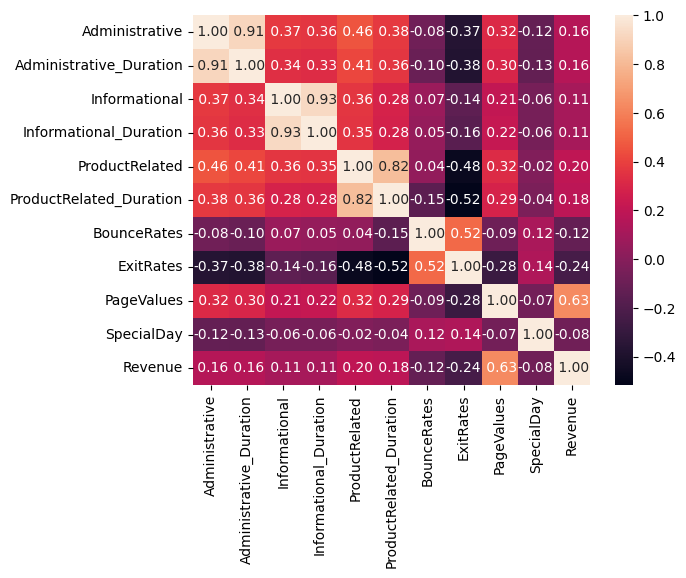

In [37]:
sns.heatmap(df[numerikal2].corr(), annot= True, fmt = ' .2f')

In [20]:
kategori_baru = ['OperatingSystems_Android', 'OperatingSystems_Windows',
       'OperatingSystems_iOS', 'OperatingSystems_other', 'Browser_Brave',
       'Browser_Google Chrome', 'Browser_Internet Explorer',
       'Browser_Microsoft Edge', 'Browser_Mozilla Firefox', 'Browser_Safari',
       'Browser_Samsung Internet', 'Browser_UC Browser', 'Browser_other',
       'Region_Bandung', 'Region_Batam', 'Region_Jakarta', 'Region_Makassar',
       'Region_Medan', 'Region_Semarang', 'Region_Surabaya',
       'Region_Tangerang', 'Region_Yogyakarta', 'TrafficType_11',
       'TrafficType_20', 'TrafficType_Affiliate Marketing',
       'TrafficType_Direct Traffic', 'TrafficType_Display Advertising',
       'TrafficType_Email Marketing ', 'TrafficType_Facebook Ads',
       'TrafficType_Organic Search', 'TrafficType_Paid Search',
       'TrafficType_Referral Traffic', 'TrafficType_Social Media',
       'TrafficType_other', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep']

In [40]:
from scipy.stats import pointbiserialr

correlation_results = {}
for column in df[kategori_baru]:
    if column != 'Revenue':  
        corr, p_value = pointbiserialr(df[column], df['Revenue'])
        correlation_results[column] = corr

for column, correlation in correlation_results.items():
    print(f"Correlation between 'Revenue' and '{column}': {correlation:.2f}")


Correlation between 'Revenue' and 'OperatingSystems_Android': -0.07
Correlation between 'Revenue' and 'OperatingSystems_Windows': 0.07
Correlation between 'Revenue' and 'OperatingSystems_iOS': -0.01
Correlation between 'Revenue' and 'OperatingSystems_other': 0.01
Correlation between 'Revenue' and 'Browser_Brave': 0.00
Correlation between 'Revenue' and 'Browser_Google Chrome': -0.00
Correlation between 'Revenue' and 'Browser_Internet Explorer': -0.03
Correlation between 'Revenue' and 'Browser_Microsoft Edge': 0.02
Correlation between 'Revenue' and 'Browser_Mozilla Firefox': 0.02
Correlation between 'Revenue' and 'Browser_Safari': -0.01
Correlation between 'Revenue' and 'Browser_Samsung Internet': -0.01
Correlation between 'Revenue' and 'Browser_UC Browser': 0.02
Correlation between 'Revenue' and 'Browser_other': 0.00
Correlation between 'Revenue' and 'Region_Bandung': 0.01
Correlation between 'Revenue' and 'Region_Batam': 0.00
Correlation between 'Revenue' and 'Region_Jakarta': 0.02
Cor

**Feature Selection**

Mengdrop feature:  
-Administrative_Duration karena highly correlated dengan Administrative  
-Informational_Duration karena highly correlated dengan Informational  
-ProductRelated_Duration karena highly correlated dengan ProductRelated  
-SpecialDay karena korelasi dengan target sangat rendah  



**Feature Extraction**

In [23]:
df['Avg_Duration'] = df['ProductRelated_Duration']/df['ProductRelated']

Average Session Duration: Menghitung rata-rata waktu yang dihabiskan oleh pelanggan dengan membagi 'ProductRelated_Duration' dan 'ProductRelated'.


**Feature Tambahan**

1. Session hour
2. Has promo
3. Top product related
4. Kategori

# Modelling

## Random Forest

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

def metrics(y_test, y_pred):
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    tpr_recall = recall_score(y_test, y_pred)
    fpr = fp / (fp + tn)
    tnr_specificity = tn / (tn + fp)
    precision = precision_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)

    print(f"Accuracy = {accuracy}")
    print(f"Error Rate = {error_rate}")
    print(f"True Positive Rate (Recall) = {tpr_recall}")
    print(f"False Positive Rate = {fpr}")
    print(f"True Negative Rate (Specificity) = {tnr_specificity}")
    print(f"Precision = {precision}")
    print(f"F1Score = {f1score}")


### Class Decision Tree

In [32]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
cdt_classifier = DecisionTreeClassifier(random_state=42)
cdt_classifier.fit(X_res, y_res)
y_pred1 = cdt_classifier.predict(X_test_scaled)


In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
cdt_classifier2 = DecisionTreeClassifier(random_state=42)
cdt_classifier2.fit(X_res2, y_res2)
y_pred12 = cdt_classifier2.predict(X_test_scaled2)


In [36]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
cdt_classifier3 = DecisionTreeClassifier(random_state=42)
cdt_classifier3.fit(X_ada, y_ada)
y_pred_ada = cdt_classifier3.predict(X_test_scaled)

In [37]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
cdt_classifier4 = DecisionTreeClassifier(random_state=42)
cdt_classifier4.fit(X_train_scaled, y_train)
y_pred_without = cdt_classifier4.predict(X_test_scaled)

### Random Forest

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_res, y_res)
y_pred2 = rf_classifier.predict(X_test_scaled)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier2.fit(X_res2, y_res2)
y_pred22 = rf_classifier2.predict(X_test_scaled2)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier3.fit(X_res3, y_res3)
y_pred23 = rf_classifier3.predict(X_test_scaled3)

### K-Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_res, y_res)
y_pred3 = knn.predict(X_test_scaled)

### XGBoost

In [42]:
import xgboost as xgb
XGboost = xgb.XGBClassifier()
XGboost.fit(X_res, y_res)
y_pred4 = XGboost.predict(X_test_scaled)

### ADABoost

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_classifier.fit(X_res, y_res)
y_pred_AB = adaboost_classifier.predict(X_test_scaled)

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
adaboost_classifier2 = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_classifier2.fit(X_res2, y_res2)
y_pred_AB2 = adaboost_classifier2.predict(X_test_scaled2)

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_res, y_res)
y_pred_log = model.predict(X_test_scaled)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model2 = LogisticRegression()
model2.fit(X_res2, y_res2)
y_pred_log2 = model2.predict(X_test_scaled2)

## Evaluasi Model

In [57]:
print("Model: Decision Tree Classifier")
metrics(y_test, y_pred1)
print("-" * 40) 
print("Model: Decision Tree Classifier drop kolom")
metrics(y_test2, y_pred12)
print("-" * 40)
print("Model: Decision Tree Classifier with adasyn")
metrics(y_test, y_pred_ada)
print("-" * 40)
print("Model: Decision Tree Classifier without oversampling")
metrics(y_test, y_pred_without)
print("-" * 40)
print("Model: RandomForest Classifier Original")
metrics(y_test, y_pred2)
print("-" * 40)
print("Model: RandomForest Classifier drop kolom")
metrics(y_test2, y_pred22)
print("-" * 40)
print("Model: RandomForest Classifier drop PageValue")
metrics(y_test3, y_pred23)
print("-" * 40)
print("Model: XGBoost Classifier")
metrics(y_test, y_pred22)
print("-" * 40)
print("Model: ADABoost Classifier")
metrics(y_test, y_pred_AB)
print("-" * 40)
print("Model: ADABoost Classifier drop kolom")
metrics(y_test2, y_pred_AB2)
print("-" * 40)
print("Model: K-Neighbors Classifier")
metrics(y_test, y_pred3)
print("-" * 40)
print("Model: Logistic Regression Classifier")
metrics(y_test, y_pred_log)
print("-" * 40)
print("Model: Logistic Regression Classifier drop kolom")
metrics(y_test2, y_pred_log2)

Model: Decision Tree Classifier
Accuracy = 0.8498134328358209
Error Rate = 0.1501865671641791
True Positive Rate (Recall) = 0.6301369863013698
False Positive Rate = 0.10511523327712198
True Negative Rate (Specificity) = 0.894884766722878
Precision = 0.5515587529976019
F1Score = 0.5882352941176471
----------------------------------------
Model: Decision Tree Classifier drop kolom
Accuracy = 0.7397388059701493
Error Rate = 0.2602611940298507
True Positive Rate (Recall) = 0.29041095890410956
False Positive Rate = 0.16807195053400786
True Negative Rate (Specificity) = 0.8319280494659921
Precision = 0.2617283950617284
F1Score = 0.27532467532467536
----------------------------------------
Model: Decision Tree Classifier with adasyn
Accuracy = 0.8484141791044776
Error Rate = 0.15158582089552242
True Positive Rate (Recall) = 0.6109589041095891
False Positive Rate = 0.10286677908937605
True Negative Rate (Specificity) = 0.897133220910624
Precision = 0.5492610837438424
F1Score = 0.57846952010376

In [59]:
print("Model: Decision Tree Classifier drop kolom")
metrics(y_test2, y_pred12)
print("-" * 40)
print("Model: RandomForest Classifier drop kolom")
metrics(y_test2, y_pred22)
print("-" * 40)
print("Model: ADABoost Classifier drop kolom")
metrics(y_test2, y_pred_AB2)
print("-" * 40)
print("Model: Logistic Regression Classifier drop kolom")
metrics(y_test2, y_pred_log2)

Model: Decision Tree Classifier drop kolom
Accuracy = 0.7397388059701493
Error Rate = 0.2602611940298507
True Positive Rate (Recall) = 0.29041095890410956
False Positive Rate = 0.16807195053400786
True Negative Rate (Specificity) = 0.8319280494659921
Precision = 0.2617283950617284
F1Score = 0.27532467532467536
----------------------------------------
Model: RandomForest Classifier drop kolom
Accuracy = 0.8097014925373134
Error Rate = 0.19029850746268662
True Positive Rate (Recall) = 0.23013698630136986
False Positive Rate = 0.0713884204609331
True Negative Rate (Specificity) = 0.9286115795390669
Precision = 0.3981042654028436
F1Score = 0.29166666666666663
----------------------------------------
Model: ADABoost Classifier drop kolom
Accuracy = 0.7756529850746269
Error Rate = 0.22434701492537312
True Positive Rate (Recall) = 0.42191780821917807
False Positive Rate = 0.15177065767284992
True Negative Rate (Specificity) = 0.8482293423271501
Precision = 0.3632075471698113
F1Score = 0.39036

In [70]:
from sklearn.model_selection import cross_validate
def eval_classification(model):
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

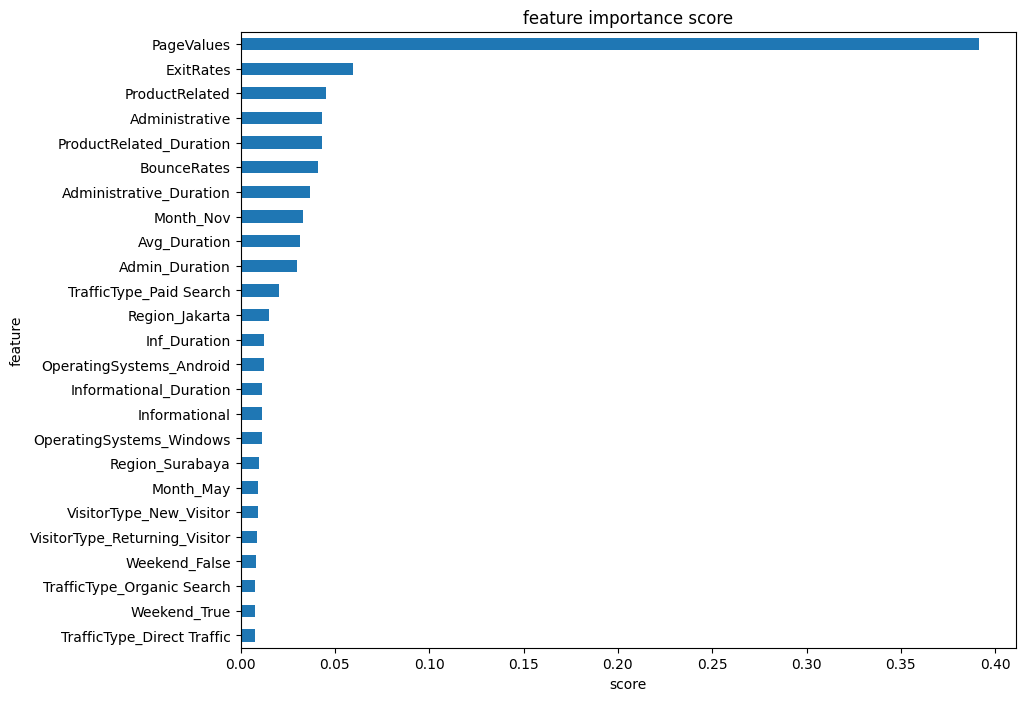

In [86]:
show_feature_importance(rf_classifier)

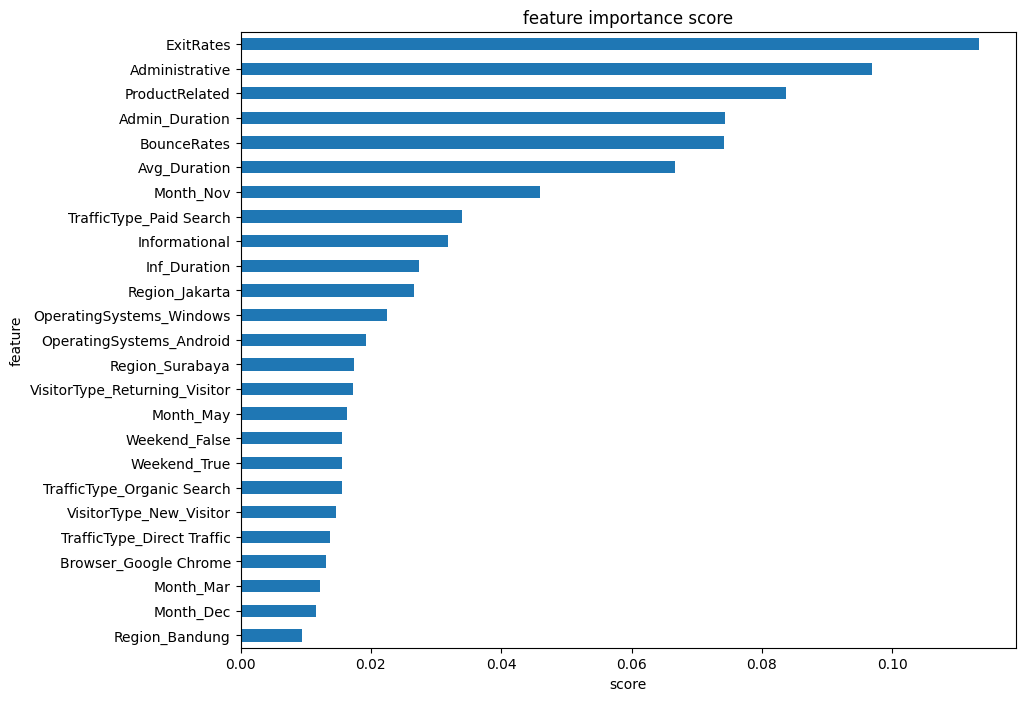

In [76]:
show_feature_importance(rf_classifier2)